# Analysis of Diabetes Dataset

### Introduction

introduction

### Data Summary

- Number of times pregnant
- Plasma glucose concentration at 2 hours in an oral glucose tolerance test
- Diastolic blood pressure (mmHg)
- Tricepts skin fold thickness (mm)
- 2-Hour serum insulin (mu U/ml)
- Body mass index (weight in kg/(height in m)^2)
- Diabetes pedigree function
- Age (years)

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as mpl
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.preprocessing import Binarizer

df = pd.read_csv('https://raw.githubusercontent.com/jonpb99/Data_Analytics_List_Comprehension/main/Project1_Dataset/diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [4]:
for k in df:
  print(np.unique(df[k]))
  print()

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 17]

[  0  44  56  57  61  62  65  67  68  71  72  73  74  75  76  77  78  79
  80  81  82  83  84  85  86  87  88  89  90  91  92  93  94  95  96  97
  98  99 100 101 102 103 104 105 106 107 108 109 110 111 112 113 114 115
 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131 132 133
 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149 150 151
 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167 168 169
 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 186 187 188
 189 190 191 193 194 195 196 197 198 199]

[  0  24  30  38  40  44  46  48  50  52  54  55  56  58  60  61  62  64
  65  66  68  70  72  74  75  76  78  80  82  84  85  86  88  90  92  94
  95  96  98 100 102 104 106 108 110 114 122]

[ 0  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30
 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 54 56
 60 63 99]

[  0  14  15  16  18  22  23  25  29  32 

In [5]:
df.min()

Pregnancies                  0.000
Glucose                      0.000
BloodPressure                0.000
SkinThickness                0.000
Insulin                      0.000
BMI                          0.000
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [6]:
df.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
SkinThickness                99.00
Insulin                     846.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

In [7]:
zero_values = df[df['Glucose']==0].count()['Glucose']
zero_values

5

In [8]:
zero_values = df[df['BloodPressure']==0].count()['BloodPressure']
zero_values

35

In [9]:
zero_values = df[df['SkinThickness']==0].count()['SkinThickness']
zero_values

227

In [10]:
zero_values = df[df['Insulin']==0].count()['Insulin']
zero_values

374

In [11]:
zero_values = df[df['BMI']==0].count()['BMI']
zero_values

11

<AxesSubplot:xlabel='Outcome', ylabel='count'>

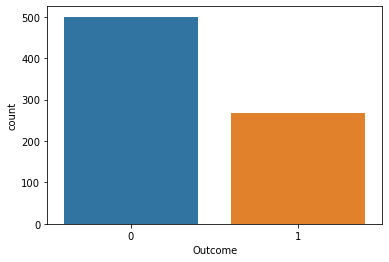

In [12]:
sns.countplot(x="Outcome", data=df)

<AxesSubplot:xlabel='Age', ylabel='Pregnancies'>

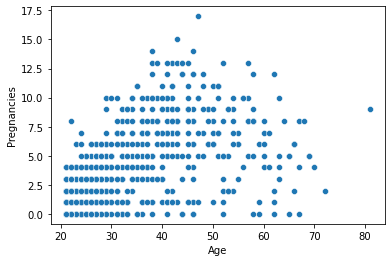

In [20]:
sns.scatterplot(x = "Age", y = "Pregnancies", data = df)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

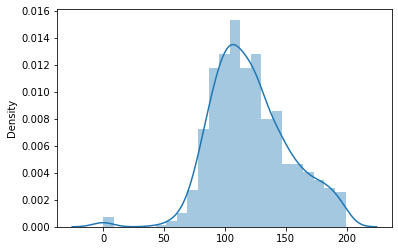

In [21]:
sns.distplot(tuple(df['Glucose']))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

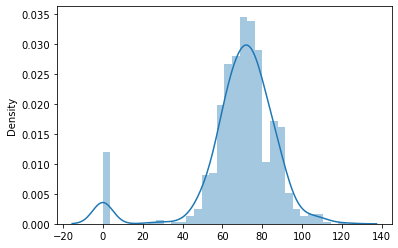

In [22]:
sns.distplot(tuple(df['BloodPressure']))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

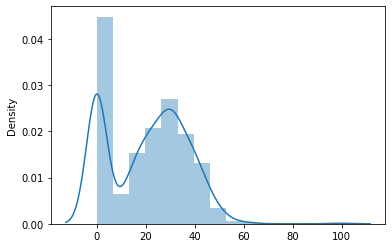

In [24]:
sns.distplot(tuple(df['SkinThickness']))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

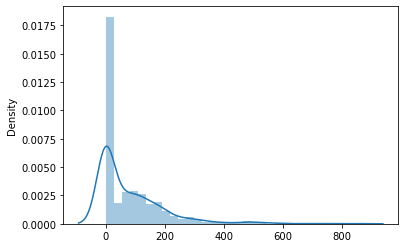

In [25]:
sns.distplot(tuple(df['Insulin']))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

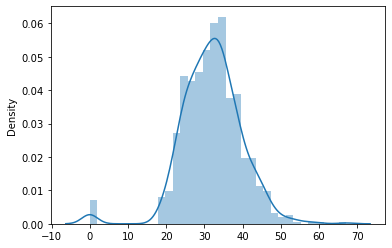

In [26]:
sns.distplot(tuple(df['BMI']))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

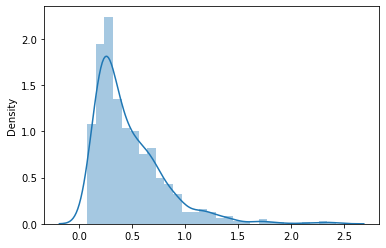

In [27]:
sns.distplot(tuple(df['DiabetesPedigreeFunction']))

In [28]:
df1 = df[['Pregnancies','Glucose','BloodPressure','BMI','DiabetesPedigreeFunction','Age','Outcome']]

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.281805,0.041265,0.239528,0.065068
BMI,0.017683,0.221071,0.281805,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.292695,0.173844,0.238356,1.000000


In [31]:
df1['BloodPressure'].replace(0,df['BloodPressure'].median(),inplace=True)
df1['BMI'].replace(0,df['BMI'].median(),inplace=True)
df1['Glucose'].replace(0,df['Glucose'].median(),inplace=True)

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:4509: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().replace(


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

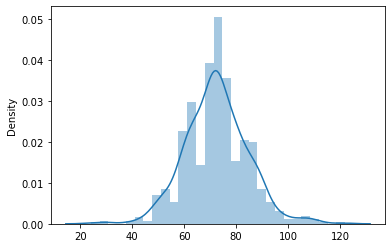

In [33]:
sns.distplot(tuple(df1['BloodPressure']))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

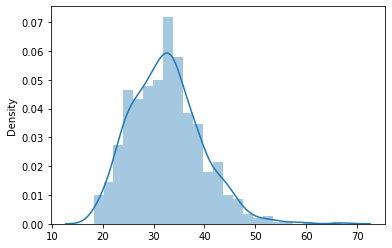

In [34]:
sns.distplot(tuple(df1['BMI']))

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

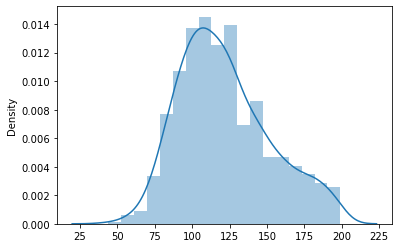

In [35]:
sns.distplot(tuple(df1['Glucose']))

In [36]:
df1.corr()

,Pregnancies,Glucose,BloodPressure,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.128213,0.208615,0.021546,-0.033523,0.544341,0.221898
Glucose,0.128213,1.000000,0.218937,0.231400,0.137327,0.266909,0.492782
BloodPressure,0.208615,0.218937,1.000000,0.281132,-0.002378,0.324915,0.165723
BMI,0.021546,0.231400,0.281132,1.000000,0.153506,0.025744,0.312249
DiabetesPedigreeFunction,-0.033523,0.137327,-0.002378,0.153506,1.000000,0.033561,0.173844
Age,0.544341,0.266909,0.324915,0.025744,0.033561,1.000000,0.238356
Outcome,0.221898,0.492782,0.165723,0.312249,0.173844,0.238356,1.000000


In [37]:
df1.min()

Pregnancies                  0.000
Glucose                     44.000
BloodPressure               24.000
BMI                         18.200
DiabetesPedigreeFunction     0.078
Age                         21.000
Outcome                      0.000
dtype: float64

In [38]:
df1.max()

Pregnancies                  17.00
Glucose                     199.00
BloodPressure               122.00
BMI                          67.10
DiabetesPedigreeFunction      2.42
Age                          81.00
Outcome                       1.00
dtype: float64

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [45]:
df2=df1.copy()

df2_cols = ['Pregnancies','Glucose','BloodPressure','BMI','DiabetesPedigreeFunction','Age']
X = df[df2_cols]
y = df2.Outcome
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=0)

In [47]:
lrmodel=LogisticRegression()
lrmodel = lrmodel.fit(X, y)
lrmodel.score(X, y)

0.7708333333333334

In [48]:
pd.DataFrame(zip(X.columns, np.transpose(lrmodel.coef_)))

,0,1
0,Pregnancies,[0.12416089780644975]
1,Glucose,[0.033467817157042334]
2,BloodPressure,[-0.01346699889128201]
3,BMI,[0.08777322336347293]
4,DiabetesPedigreeFunction,[0.8245809787369026]
5,Age,[0.016391617947024564]


In [50]:
y_pred = lrmodel.predict(X_test)

In [51]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.91      0.86       130
           1       0.76      0.60      0.67        62

    accuracy                           0.81       192
   macro avg       0.79      0.75      0.77       192
weighted avg       0.80      0.81      0.80       192



In [52]:
from imblearn.over_sampling import SMOTE
os = SMOTE(random_state=0)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
columns = X_train.columns
os_data_X,os_data_y=os.fit_sample(X_train, y_train)
os_data_X = pd.DataFrame(data=os_data_X,columns=columns )
os_data_y= pd.DataFrame(data=os_data_y,columns=['y'])
# we can Check the numbers of our data
print("length of oversampled data is ",len(os_data_X))
print("Number of no subscription in oversampled data",len(os_data_y[os_data_y['y']==0]))
print("Number of subscription",len(os_data_y[os_data_y['y']==1]))
print("Proportion of no subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==0])/len(os_data_X))
print("Proportion of subscription data in oversampled data is ",len(os_data_y[os_data_y['y']==1])/len(os_data_X))

ModuleNotFoundError: No module named 'imblearn'